# ONE DAY PREDICTION

In [83]:
#pip install yfinance

In [84]:
#See the yahoo finance ticker for your stock symbol

#stock_symbol = '^GSPC'
stock_symbol = '^VIX'

#stock_symbol = 'CL=F'
#stock_symbol = 'NG=F'

#stock_symbol = 'GC=F'
#stock_symbol = 'SI=F'
#stock_symbol = 'HG=F'

#stock_symbol = 'EURUSD=X'
#stock_symbol = 'EURCHF=X'

Object_study = 'VIX'

In [85]:
#pip install numpy==1.19.5

In [86]:
#pip install plotly==5.3.1

In [87]:
#pip install keras

In [88]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from plotly.graph_objs import graph_objs
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6
plt.style.use('fivethirtyeight')

In [89]:
import keras

In [90]:
import yfinance as yf

In [91]:
import plotly.graph_objs as go

In [92]:
#Set the start and end date for the analysis
#start = datetime(2016, 12, 27)
#end = datetime(2021, 12, 28)
#origdata = yf.download(tickers=stock_symbol, start=start, end=end)

In [93]:
origdata = yf.download(tickers=stock_symbol, period='5y', interval='1d')
origdata

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-17,12.200000,12.750000,11.790000,11.870000,11.870000,0
2017-01-18,11.790000,12.810000,11.690000,12.480000,12.480000,0
2017-01-19,12.580000,13.280000,12.170000,12.780000,12.780000,0
2017-01-20,12.580000,12.590000,11.530000,11.540000,11.540000,0
2017-01-23,12.300000,12.620000,11.590000,11.770000,11.770000,0
...,...,...,...,...,...,...
2022-01-10,19.580000,23.330000,19.290001,19.400000,19.400000,0
2022-01-11,19.620001,21.000000,18.200001,18.410000,18.410000,0
2022-01-12,18.170000,18.690001,17.360001,17.620001,17.620001,0


Text(0, 0.5, 'Close Price ($)')

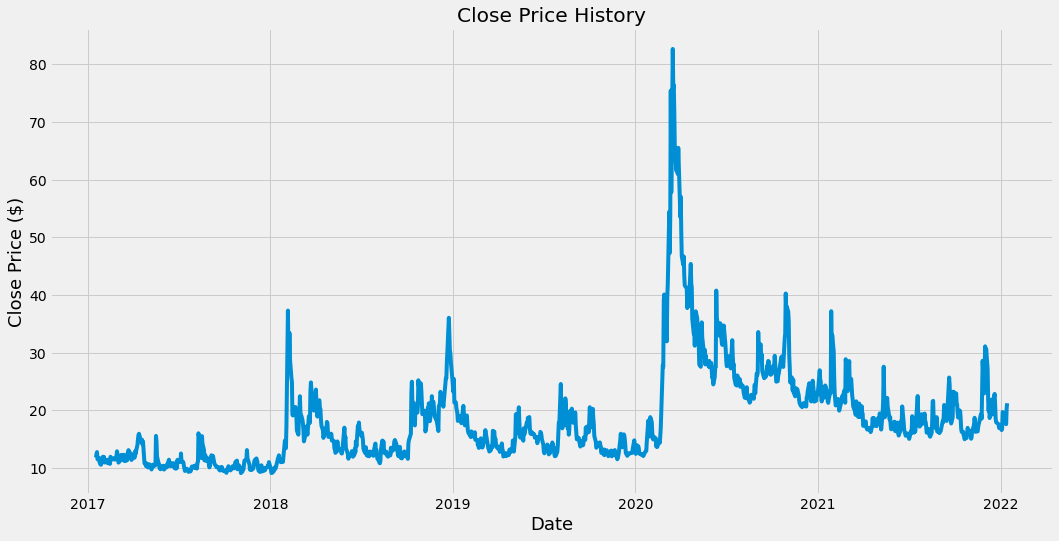

In [94]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(origdata['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($)', fontsize=18)

In [95]:
origdata = origdata.filter(['Close'])
origdata

,Close
Date,
2017-01-17,11.870000
2017-01-18,12.480000
2017-01-19,12.780000
2017-01-20,11.540000
2017-01-23,11.770000
...,...
2022-01-10,19.400000
2022-01-11,18.410000
2022-01-12,17.620001


In [96]:
#df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

In [97]:
# Create isocalendar
closingdata = origdata
closingdata["week"] = closingdata.index.isocalendar().week

# Completing Time Series
idx = pd.date_range(closingdata.index[0], closingdata.index[-1]) #create dates for completed time series
completedata =closingdata.reindex(idx, fill_value= float("NaN")) #complete missing dates with NAN
completedata = completedata.fillna(method='ffill') #fill NAN with last observation (e.g., Value for Friday on Weekend)


In [98]:
cols_to_keep = ["Close"]
alldata = completedata.loc[:,cols_to_keep]
alldata

,Close
2017-01-17,11.870000
2017-01-18,12.480000
2017-01-19,12.780000
2017-01-20,11.540000
2017-01-21,11.540000
...,...
2022-01-10,19.400000
2022-01-11,18.410000
2022-01-12,17.620001
2022-01-13,20.309999


In [99]:
dataset = alldata.values
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

1460

In [100]:
dataset.shape

(1824, 1)

# Scaling data

In [101]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))


In [102]:
scaled_dataset = scaler.fit_transform(dataset)
scaled_dataset

array([[0.0371176 ],
       [0.04541127],
       [0.04949013],
       ...,
       [0.11529572],
       [0.15186946],
       [0.16464989]])

In [103]:
scaled_dataset.shape

(1824, 1)

# create training dataset
# x_train (1401,60,1) and y_train (1401,)
# TO TRAIN THE MODEL

In [104]:
#Create the training data set and the scaled training data set
data_trainingscaled=scaled_dataset[0:training_data_len,:]#data_trainingscaled REPLACED train_data
data_trainingscaled

array([[0.0371176 ],
       [0.04541127],
       [0.04949013],
       ...,
       [0.17770222],
       [0.19184227],
       [0.20666213]])

In [105]:
data_trainingscaled.shape

(1460, 1)

In [106]:
#split the data into x_train and y_train data sets
x_train = []
y_train = []

In [107]:
len(data_trainingscaled)

1460

In [108]:
#set training for 60 days, look back is the timeframe for the LSTM model 
look_back=60

for i in range (look_back, len(data_trainingscaled)):
    x_train.append(data_trainingscaled[i-look_back:i,0])
    y_train.append(data_trainingscaled[i,0])
  

In [109]:
  if i<=61:
        print(x_train)
        print(y_train)
        print()

In [110]:
#convert x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train), np.array(y_train)


In [111]:
print(x_train.shape)
print(y_train.shape)

(1400, 60)
(1400,)


In [112]:
x_train

array([[0.0371176 , 0.04541127, 0.04949013, ..., 0.03385452, 0.02814411,
        0.02909584],
       [0.04541127, 0.04949013, 0.03263086, ..., 0.02814411, 0.02909584,
        0.02909584],
       [0.04949013, 0.03263086, 0.03263086, ..., 0.02909584, 0.02909584,
        0.02909584],
       ...,
       [0.18980285, 0.18980285, 0.18096533, ..., 0.1688647 , 0.20312711,
        0.19292997],
       [0.18980285, 0.18096533, 0.18450032, ..., 0.20312711, 0.19292997,
        0.17770222],
       [0.18096533, 0.18450032, 0.19986403, ..., 0.19292997, 0.17770222,
        0.19184227]])

In [113]:
#reshape the data :
#Since the LSTM model takes input a 3 Dimensional array, 
#the 2 Dimension array was expanded to 3 Dimensions
x_train=np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1400, 60, 1)

In [114]:
x_train

array([[[0.0371176 ],
        [0.04541127],
        [0.04949013],
        ...,
        [0.03385452],
        [0.02814411],
        [0.02909584]],

       [[0.04541127],
        [0.04949013],
        [0.03263086],
        ...,
        [0.02814411],
        [0.02909584],
        [0.02909584]],

       [[0.04949013],
        [0.03263086],
        [0.03263086],
        ...,
        [0.02909584],
        [0.02909584],
        [0.02909584]],

       ...,

       [[0.18980285],
        [0.18980285],
        [0.18096533],
        ...,
        [0.1688647 ],
        [0.20312711],
        [0.19292997]],

       [[0.18980285],
        [0.18096533],
        [0.18450032],
        ...,
        [0.20312711],
        [0.19292997],
        [0.17770222]],

       [[0.18096533],
        [0.18450032],
        [0.19986403],
        ...,
        [0.19292997],
        [0.17770222],
        [0.19184227]]])

In [115]:
y_train

array([0.02909584, 0.02909584, 0.02991162, ..., 0.17770222, 0.19184227,
       0.20666213])

# create the model using LSTM using Sequential function and NN 50-50-25-1


In [116]:
from keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,Activation, Flatten, Conv2D, MaxPooling2D

In [117]:
model = Sequential()

In [118]:
#build LSTM model

model.add(LSTM(50,activation='sigmoid',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,activation='sigmoid',return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [119]:
#model.summary()

In [120]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [121]:
#train the model
model.fit(x_train,y_train, batch_size=32,epochs=50)

Epoch 1/50
44/44 [==============================] - 11s 74ms/step - loss: 0.0252
Epoch 2/50
44/44 [==============================] - 3s 79ms/step - loss: 0.0166
Epoch 3/50
44/44 [==============================] - 3s 78ms/step - loss: 0.0173
Epoch 4/50
44/44 [==============================] - 3s 78ms/step - loss: 0.0160
Epoch 5/50
44/44 [==============================] - 3s 78ms/step - loss: 0.0180
Epoch 6/50
44/44 [==============================] - 3s 73ms/step - loss: 0.0126
Epoch 7/50
44/44 [==============================] - 3s 74ms/step - loss: 0.0118
Epoch 8/50
44/44 [==============================] - 3s 77ms/step - loss: 0.0046
Epoch 9/50
44/44 [==============================] - 3s 74ms/step - loss: 0.0023
Epoch 10/50
44/44 [==============================] - 3s 78ms/step - loss: 0.0018: 1s
Epoch 11/50
44/44 [==============================] - 3s 77ms/step - loss: 0.0025: 
Epoch 12/50
44/44 [==============================] - 3s 73ms/step - loss: 0.0016
Epoch 13/50
44/44 [===========

# preparing for test data set

# data_testing (array 365 backwards from today)

In [122]:
data_testing = dataset[training_data_len:]
data_testing.shape

(364, 1)

# data_testing (array 365 backwards from today)

In [123]:
#data_testing = dataset[training_data_len - 60: , :]
#data_testing.shape

# training data (1008 onwards from beginning)

In [124]:
#training_data = dataset[:training_data_len]
#training_data

In [125]:
#training_data.shape

# testing_datascaled (365 backwards from today)

In [126]:
#create a new array containing scaled values 
#data_testingscaled = scaled_data[training_data_len - 60: , :]
#data_testingscaled

data_testingscaled = scaler.transform(data_testing)
data_testingscaled.shape

(364, 1)

In [127]:
# a= scaled_dataset[numero iniziale : numero finale,]
a=scaled_dataset[training_data_len:1500,:]
a.shape

(40, 1)

# create the data set x_test and y_test
# x_test (252,60,1) and y_test (252)

In [128]:
x_test = []
y_test = data_testingscaled[60:]

for i in range(60, len(data_testingscaled)):
    x_test.append(data_testingscaled[i-60:i,0])

In [129]:
#the lists coming out from the previous block need to be transformed in a numy array

In [130]:
x_test , y_test = np.array(x_test) ,np.array(y_test)

In [131]:
x_test.shape

(304, 60)

In [132]:
#reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(304, 60, 1)

In [133]:
x_test

array([[[0.20666213],
        [0.20666213],
        [0.20666213],
        ...,
        [0.15703603],
        [0.14806254],
        [0.14479946]],

       [[0.20666213],
        [0.20666213],
        [0.19170631],
        ...,
        [0.14806254],
        [0.14479946],
        [0.13718557]],

       [[0.20666213],
        [0.19170631],
        [0.16913663],
        ...,
        [0.14479946],
        [0.13718557],
        [0.16913663]],

       ...,

       [[0.09721279],
        [0.09721279],
        [0.09993201],
        ...,
        [0.13079537],
        [0.13949693],
        [0.1260367 ]],

       [[0.09721279],
        [0.09993201],
        [0.09830048],
        ...,
        [0.13949693],
        [0.1260367 ],
        [0.11529572]],

       [[0.09993201],
        [0.09830048],
        [0.10836166],
        ...,
        [0.1260367 ],
        [0.11529572],
        [0.15186946]]])

In [134]:
y_test.shape

(304, 1)

In [135]:
y_test = scaler.inverse_transform(y_test)
y_test

array([[19.22999954],
       [21.57999992],
       [20.95000076],
       [20.95000076],
       [20.95000076],
       [18.87999916],
       [20.29999924],
       [21.20000076],
       [19.80999947],
       [18.86000061],
       [18.86000061],
       [18.86000061],
       [20.73999977],
       [19.61000061],
       [19.39999962],
       [17.32999992],
       [17.32999992],
       [17.32999992],
       [17.32999992],
       [17.90999985],
       [18.12000084],
       [17.15999985],
       [16.95000076],
       [16.69000053],
       [16.69000053],
       [16.69000053],
       [16.90999985],
       [16.64999962],
       [16.98999977],
       [16.56999969],
       [16.25      ],
       [16.25      ],
       [16.25      ],
       [17.29000092],
       [18.68000031],
       [17.5       ],
       [18.70999908],
       [17.32999992],
       [17.32999992],
       [17.32999992],
       [17.63999939],
       [17.55999947],
       [17.28000069],
       [17.61000061],
       [18.61000061],
       [18

In [136]:
# get the models predicted price values
predictions = model.predict(x_test)
predictions.shape

(304, 1)

In [137]:
predictions = scaler.inverse_transform(predictions)

In [138]:
predictions

array([[19.87573  ],
       [19.398973 ],
       [20.32966  ],
       [20.314259 ],
       [20.309324 ],
       [20.313118 ],
       [19.289051 ],
       [19.60654  ],
       [20.132017 ],
       [19.621899 ],
       [18.969406 ],
       [18.711653 ],
       [18.576897 ],
       [19.42117  ],
       [19.150652 ],
       [18.95951  ],
       [17.864372 ],
       [17.44185  ],
       [17.230762 ],
       [17.095095 ],
       [17.285881 ],
       [17.427525 ],
       [16.991253 ],
       [16.720232 ],
       [16.470318 ],
       [16.350029 ],
       [16.27669  ],
       [16.33409  ],
       [16.208694 ],
       [16.319874 ],
       [16.143162 ],
       [15.914904 ],
       [15.819994 ],
       [15.768057 ],
       [16.247551 ],
       [17.105024 ],
       [16.856731 ],
       [17.407825 ],
       [16.955387 ],
       [16.818817 ],
       [16.773527 ],
       [16.905106 ],
       [16.910004 ],
       [16.77532  ],
       [16.890244 ],
       [17.425106 ],
       [17.629028 ],
       [17.72

In [139]:
print(predictions)

[[19.87573  ]
 [19.398973 ]
 [20.32966  ]
 [20.314259 ]
 [20.309324 ]
 [20.313118 ]
 [19.289051 ]
 [19.60654  ]
 [20.132017 ]
 [19.621899 ]
 [18.969406 ]
 [18.711653 ]
 [18.576897 ]
 [19.42117  ]
 [19.150652 ]
 [18.95951  ]
 [17.864372 ]
 [17.44185  ]
 [17.230762 ]
 [17.095095 ]
 [17.285881 ]
 [17.427525 ]
 [16.991253 ]
 [16.720232 ]
 [16.470318 ]
 [16.350029 ]
 [16.27669  ]
 [16.33409  ]
 [16.208694 ]
 [16.319874 ]
 [16.143162 ]
 [15.914904 ]
 [15.819994 ]
 [15.768057 ]
 [16.247551 ]
 [17.105024 ]
 [16.856731 ]
 [17.407825 ]
 [16.955387 ]
 [16.818817 ]
 [16.773527 ]
 [16.905106 ]
 [16.910004 ]
 [16.77532  ]
 [16.890244 ]
 [17.425106 ]
 [17.629028 ]
 [17.729992 ]
 [17.645857 ]
 [18.215492 ]
 [18.27787  ]
 [17.953861 ]
 [17.013275 ]
 [16.659485 ]
 [16.486254 ]
 [17.847313 ]
 [19.408947 ]
 [22.894527 ]
 [22.093357 ]
 [19.851162 ]
 [19.118265 ]
 [18.812943 ]
 [19.08836  ]
 [19.944813 ]
 [20.66546  ]
 [20.212833 ]
 [19.832756 ]
 [19.704603 ]
 [19.646881 ]
 [18.743698 ]
 [18.60902  ]
 [17.7

In [140]:
#get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean (predictions - y_test)**2)
rmse

0.615964230738188

In [141]:
#start = datetime(2016, 12, 27)
#end = datetime(2021, 12, 28)
#origdata = yf.download(tickers=stock_symbol, start=start, end=end)

# PREPARING TO plot the data

In [142]:
data_training = dataset[:training_data_len]
data_training=pd.DataFrame(data_training)


training_datadates = pd.DataFrame()
training_datadates['Date'] = pd.date_range('01/11/2017', periods = 1462 , freq ='d')

data_training.columns=['Actual_Close']
data_training = pd.concat([training_datadates,data_training],axis=1)


#data_training.set_index(data_training["Date"], inplace=True)
#data_training=data_training.drop(['Date'], axis=1)
data_training

,Date,Actual_Close
0,2017-01-11,11.870000
1,2017-01-12,12.480000
2,2017-01-13,12.780000
3,2017-01-14,11.540000
4,2017-01-15,11.540000
...,...,...
1457,2021-01-07,22.209999
1458,2021-01-08,23.250000
1459,2021-01-09,24.340000
1460,2021-01-10,NaN


In [143]:
valid = dataset[training_data_len:]
valid = pd.DataFrame(valid)

validdates = pd.DataFrame()
validdates['Date'] = pd.date_range('01/12/2021', periods = 365 , freq ='d')

valid.columns=['Actual_Close']
valid = pd.concat([validdates,valid],axis=1)
#valid.set_index(valid["Date"], inplace=True)
#valid=valid.drop(['Date'], axis=1)
valid

,Date,Actual_Close
0,2021-01-12,24.340000
1,2021-01-13,24.340000
2,2021-01-14,24.340000
3,2021-01-15,23.240000
4,2021-01-16,21.580000
...,...,...
360,2022-01-07,18.410000
361,2022-01-08,17.620001
362,2022-01-09,20.309999
363,2022-01-10,21.250000


In [144]:
predictions=pd.DataFrame(predictions)

predictionsdates=pd.DataFrame()
predictionsdates['Date']=pd.date_range('03/13/2021', periods=305 ,freq='d')

predictions.columns=['Predicted_Close']
predictions=pd.concat([predictionsdates,predictions],axis=1)
#predictions.set_index(predictions["Date"], inplace=True)
#predictions=predictions.drop(['Date'], axis=1)
predictions

,Date,Predicted_Close
0,2021-03-13,19.875731
1,2021-03-14,19.398973
2,2021-03-15,20.329660
3,2021-03-16,20.314259
4,2021-03-17,20.309324
...,...,...
300,2022-01-07,18.367649
301,2022-01-08,18.015123
302,2022-01-09,17.510424
303,2022-01-10,18.653351


In [145]:
#pastandforecast = pd.concat([valid,predictions],axis=0)
#pastandforecast

In [146]:
newdf = valid.merge(predictions,right_index=False)
newdf

,Date,Actual_Close,Predicted_Close
0,2021-03-13,19.230000,19.875731
1,2021-03-14,21.580000,19.398973
2,2021-03-15,20.950001,20.329660
3,2021-03-16,20.950001,20.314259
4,2021-03-17,20.950001,20.309324
...,...,...,...
300,2022-01-07,18.410000,18.367649
301,2022-01-08,17.620001,18.015123
302,2022-01-09,20.309999,17.510424
303,2022-01-10,21.250000,18.653351


In [147]:
newdf.set_index(newdf["Date"], inplace=True)
newdf=newdf.drop(['Date'], axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

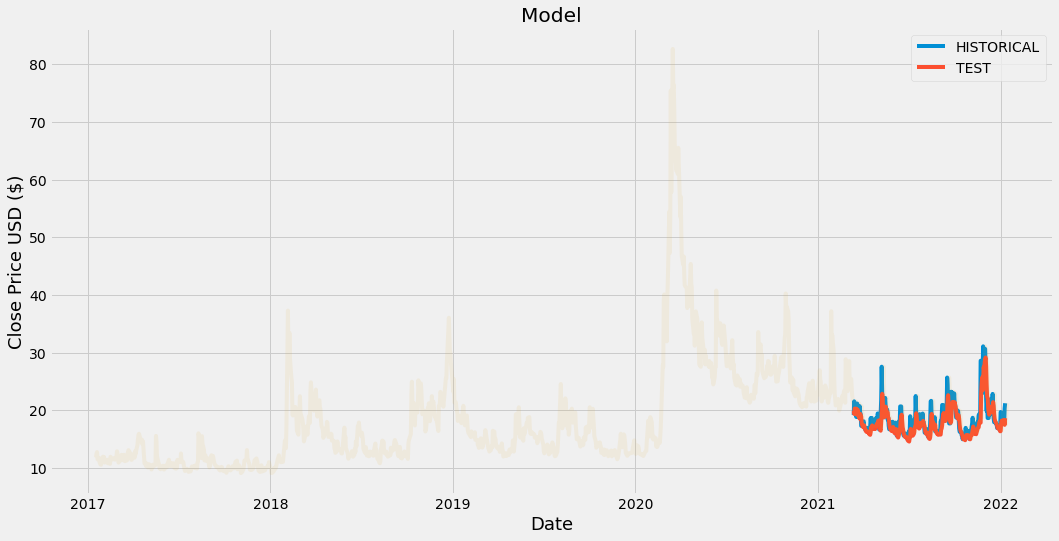

In [148]:


#visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel ('Date', fontsize = 18)
plt.ylabel ('Close Price USD ($)' , fontsize = 18)

plt.plot(newdf['Actual_Close'],label='HISTORICAL')
plt.plot(newdf['Predicted_Close'],label='TEST')
plt.plot(origdata['Close'],alpha=0.1)

plt.legend()



plt.show


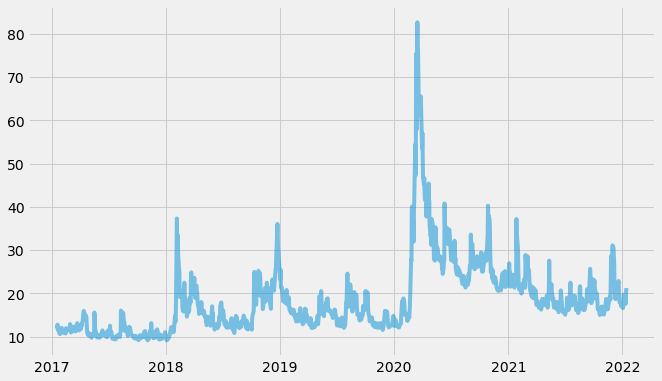

In [149]:
plt.plot(origdata['Close'],alpha=0.5)

# FUTURE FORECAST

In [150]:
last_60_days = alldata[-60:].values

In [151]:
last_60_days

array([[16.37000084],
       [17.11000061],
       [17.59000015],
       [17.90999985],
       [17.90999985],
       [17.90999985],
       [19.17000008],
       [19.37999916],
       [18.57999992],
       [18.57999992],
       [28.62000084],
       [28.62000084],
       [28.62000084],
       [22.95999908],
       [27.19000053],
       [31.12000084],
       [27.95000076],
       [30.67000008],
       [30.67000008],
       [30.67000008],
       [27.18000031],
       [21.88999939],
       [19.89999962],
       [21.57999992],
       [18.69000053],
       [18.69000053],
       [18.69000053],
       [20.30999947],
       [21.88999939],
       [19.29000092],
       [20.56999969],
       [21.56999969],
       [21.56999969],
       [21.56999969],
       [22.87000084],
       [21.01000023],
       [18.62999916],
       [17.95999908],
       [17.95999908],
       [17.95999908],
       [17.95999908],
       [17.68000031],
       [17.54000092],
       [16.95000076],
       [17.32999992],
       [17

In [152]:
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#create an empty list
X_test = []

In [153]:
#append the past 60 days
X_test.append(last_60_days_scaled)

#convert the X_test data set to a numpy array
X_test = np.array(X_test)

#reshape the data
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))


In [154]:
X_test.shape

(1, 60, 1)

In [155]:
pred_price = model.predict (X_test)
pred_price

array([[0.14126976]], dtype=float32)

In [156]:
#undo the scaling & predict for 08th March 2021
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[19.530392]]


In [157]:
pred_price=pd.DataFrame(pred_price)
pred_price

,0
0,19.530392


In [158]:
date = pd.DataFrame()
date['Date'] = pd.date_range('today', periods = 1, freq ='d')
date

,Date
0,2022-01-14 19:29:06.558317


In [159]:
forecast = pd.concat([date,pred_price],axis=1)
forecast

,Date,0
0,2022-01-14 19:29:06.558317,19.530392


In [160]:
forecast.set_index(forecast["Date"], inplace=True)
forecast=forecast.drop(['Date'], axis=1)
forecast

,0
Date,
2022-01-14 19:29:06.558317,19.530392


In [161]:
forecast.columns=['Forecasted_Close']
forecast

,Forecasted_Close
Date,
2022-01-14 19:29:06.558317,19.530392


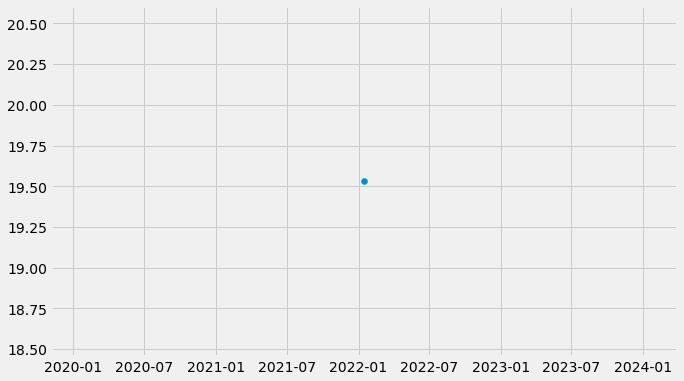

In [162]:
plt.scatter(date,forecast['Forecasted_Close'])

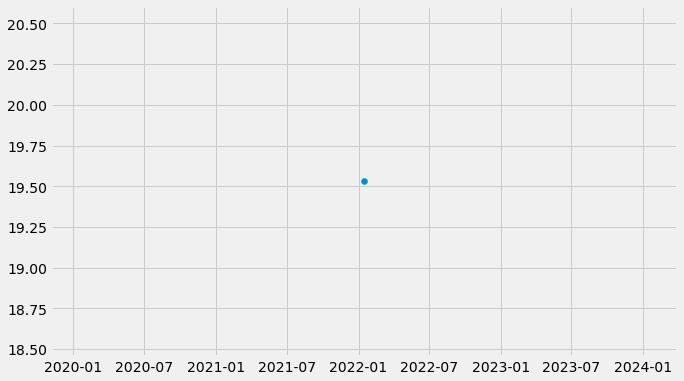

In [163]:
plt.scatter(date, forecast)

<function matplotlib.pyplot.show(close=None, block=None)>

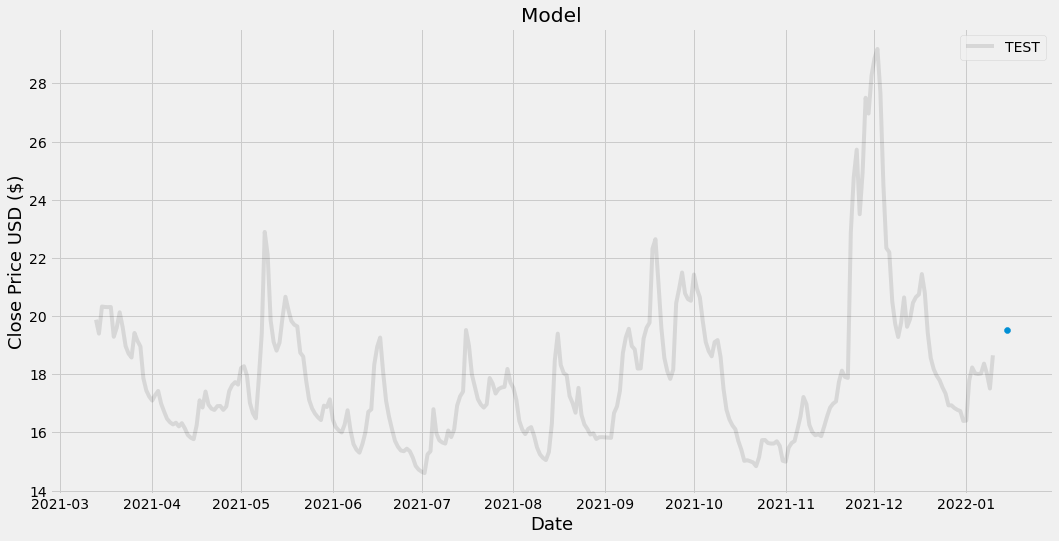

In [164]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel ('Date', fontsize = 18)
plt.ylabel ('Close Price USD ($)' , fontsize = 18)

#plt.plot(newdf['Actual_Close'],label='HISTORICAL')
plt.plot(newdf['Predicted_Close'],color='black', alpha=0.1, label='TEST')
#plt.plot(origdata['Close'],alpha=0.1)

#plt.plot(forecast['Forecasted_Close'], color='black', alpha=100, label='x')

#plt.scatter(date, forecast)
#plt.plot(forecast['Forecasted_Close'],color='black', alpha=100, label='x')
plt.scatter(date,forecast['Forecasted_Close'])
plt.legend()

plt.show